In [0]:
import pandas as pd
movies = pd.read_csv("https://github.com/dmAlbuquerque/data-science-starting/blob/master/datasets/ml-latest-small/movies.csv?raw=true")
ratings = pd.read_csv("https://github.com/dmAlbuquerque/data-science-starting/blob/master/datasets/ml-latest-small/ratings.csv?raw=true")

# Challenge 01
Determine how many movies have no ratings and which ones are

In [158]:
movies_rating_mean = ratings.groupby("movieId")["rating"].mean()
movies_mean = movies.join(movies_rating_mean, on = 'movieId')
movies_without_rating = movies_mean[movies_mean.rating.isna()]
total = movies_without_rating.movieId.count();

print("Were found "+str(total)+" unrated movies.\n")

print("List of unrated movies (alphabetically): \n")
for i in movies_without_rating.title.sort_values():
  print("* "+i)


Were found 18 unrated movies.

List of unrated movies (alphabetically): 

* Browning Version, The (1951)
* Call Northside 777 (1948)
* Chalet Girl (2011)
* Chosen, The (1981)
* Color of Paradise, The (Rang-e khoda) (1999)
* For All Mankind (1989)
* I Know Where I'm Going! (1945)
* In the Realms of the Unreal (2004)
* Innocents, The (1961)
* Mutiny on the Bounty (1962)
* Niagara (1953)
* Parallax View, The (1974)
* Proof (1991)
* Road Home, The (Wo de fu qin mu qin) (1999)
* Roaring Twenties, The (1939)
* Scrooge (1970)
* This Gun for Hire (1942)
* Twentieth Century (1934)


# Challenge 02
Rename the rating column for the dataframe movies_mean to mean_rating after joining.

In [159]:
movies_mean = movies_mean.rename(columns={"rating":"mean_rating"})
movies_mean

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


# Challenge 03
Put the number of ratings per movie, that is, not just the average, but the total votes per movie.

In [160]:
total_ratings = ratings.groupby("movieId").size()
total_ratings.name = "total_ratings"
movies_mean = movies_mean.join(total_ratings, on = "movieId")
movies_mean

,movieId,title,genres,mean_rating,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


#Challenge 04
Round as mean_rating (average grade column) to two decimal places.

In [161]:
movies_mean["mean_rating"] = movies_mean["mean_rating"].round(2)
movies_mean

,movieId,title,genres,mean_rating,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


#Challenge 05
Discover the genres of the films.

In [162]:
genre_movies = movies_mean.genres.str.get_dummies('|')
genre = genre_movies.columns.to_list()
genre

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

#Challenge 06
Count the number of appearances of each genre

In [169]:
total_movies_genre = movies_mean.genres.str.get_dummies().sum().sort_values(ascending=False)
total_movies_genre


Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#Challenge 07
Plot the appearance chart for each genre.

<function matplotlib.pyplot.show>

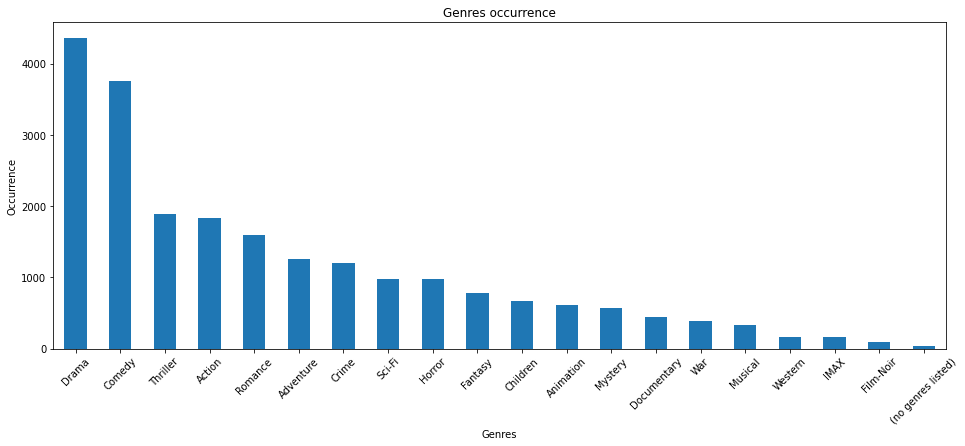

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
total_movies_genre.plot(kind='bar',title='Genres occurrence')
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.xticks(rotation=45)
plt.show